# Thermal Chemical Equilibrium for Two Species System

$\mathrm{2 H \leftrightarrow H_2}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from exogibbs.utils.constants import R_gas_constant_si
from exogibbs.io.load_data import load_molname, load_JANAF_molecules
from exogibbs.equilibrium.gibbs import interpolate_chemical_potential_one

In [29]:
df_molname = load_molname()
path_JANAF_data = "/home/kawahara/thermochemical_equilibrium/Equilibrium/JANAF"
gibbs_matrices = load_JANAF_molecules(df_molname, path_JANAF_data)

T_h_table = gibbs_matrices["H1"]['T(K)'].to_numpy()
mu_h_table = gibbs_matrices["H1"]['delta-f G'].to_numpy()
T_h2_table = gibbs_matrices["H2"]['T(K)'].to_numpy()
mu_h2_table = gibbs_matrices["H2"]['delta-f G'].to_numpy()


def mu_h(T):
    return - interpolate_chemical_potential_one(T, T_h_table, mu_h_table)
def mu_h2(T):
    return - interpolate_chemical_potential_one(T, T_h2_table, mu_h2_table)

def compute_a(P, T, Pref=1.0):
    RT = R_gas_constant_si #* T
    delta_mu = 2.0*mu_h2(T) - mu_h(T)
    return np.exp(-delta_mu / RT) * Pref/P     

Tarr = np.linspace(10.0, 6000.0, 30)
Parr = np.logspace(-8.0, 2.0, 30)
compute_a(Parr, 2000.0)

vmr_h2(compute_a(Parr,2000.0))

array([0.00374287, 0.00820601, 0.01780381, 0.03779863, 0.07695205,
       0.1457902 , 0.24917493, 0.37813491, 0.51300858, 0.63556166,
       0.73627493, 0.81360879, 0.87038382, 0.91085154, 0.93913872,
       0.95865774, 0.9720112 , 0.98109441, 0.98724929, 0.9914092 ,
       0.99421593, 0.99610746, 0.99738124, 0.99823855, 0.99881537,
       0.99920338, 0.99946433, 0.99963982, 0.99975782, 0.99983717])

In [30]:

def vmr_h(a):
    return 0.5*(np.sqrt(a**2 + 4 * a) - a)

def vmr_h2(a):
    return 0.5*(2.0 + a - np.sqrt(a**2 + 4 * a))

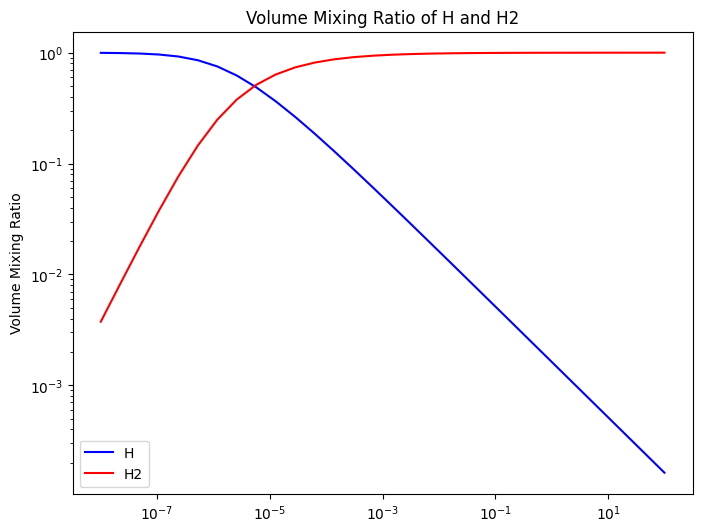

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(Parr, vmr_h(compute_a(Parr,2000.0)), label='H', color='blue')
plt.plot(Parr, vmr_h2(compute_a(Parr,2000.0)), label='H2', color='red')
plt.xscale('log')
plt.yscale('log')

plt.ylabel('Volume Mixing Ratio')
plt.title('Volume Mixing Ratio of H and H2')
plt.legend()


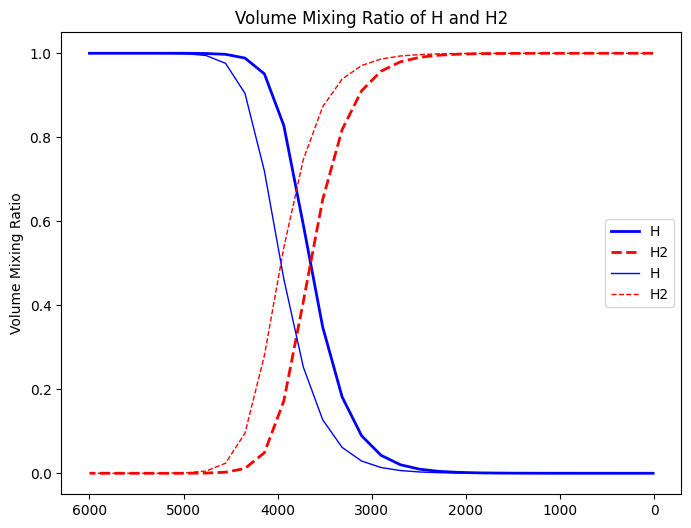

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(Tarr, vmr_h(compute_a(1.0,Tarr)), label='H', color='blue', lw=2)
plt.plot(Tarr, vmr_h2(compute_a(1.0,Tarr)), label='H2', color='red', ls='--', lw=2)
plt.plot(Tarr, vmr_h(compute_a(10.0,Tarr)), label='H', color='blue', lw=1)
plt.plot(Tarr, vmr_h2(compute_a(10.0,Tarr)), label='H2', color='red', ls='--', lw=1)

#plt.xscale('log')
#plt.yscale('log')
plt.gca().invert_xaxis()
plt.ylabel('Volume Mixing Ratio')
plt.title('Volume Mixing Ratio of H and H2')
plt.legend()
